#                                     BHARAT INTERN TASK-1

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
import os
#importing the data
df=pd.read_csv("train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
#Overview of dataset
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
check(df)

,column,dtypes,nunique,sum_null
0,Row ID,int64,9800,0
1,Order ID,object,4922,0
2,Order Date,object,1230,0
3,Ship Date,object,1326,0
4,Ship Mode,object,4,0
5,Customer ID,object,793,0
6,Customer Name,object,793,0
7,Segment,object,3,0
8,Country,object,1,0
9,City,object,529,0


In [7]:
# checking of missing data

<Axes: >

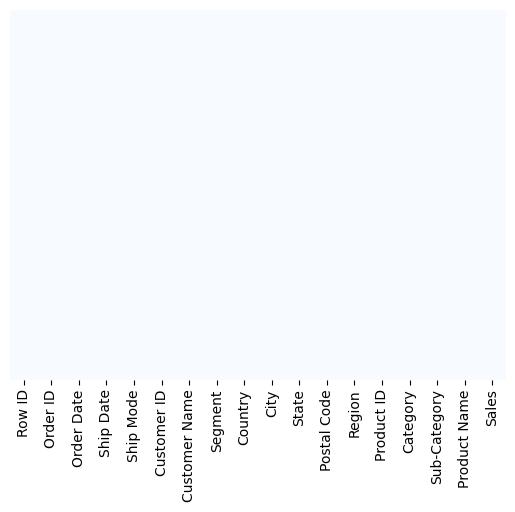

In [8]:
sns.heatmap(df.isnull(), yticklabels= False , cbar= False , cmap="Blues")

In [9]:
df[df["Postal Code"].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [10]:
# Postal code for "Burlington" is 5401
df["Postal Code"]=df["Postal Code"].fillna(5401.0)

In [11]:
#Seperating the year and put it into a separate column
import pandas as pd
df['Year']= pd.DatetimeIndex(df['Order Date']).year
df['Month']= pd.DatetimeIndex(df['Order Date']).month
df['Day']=pd.DatetimeIndex(df['Order Date']).day
df.head()

C:\Users\VISHESH SHARMA\AppData\Local\Temp\ipykernel_39568\3975726888.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year']= pd.DatetimeIndex(df['Order Date']).year
C:\Users\VISHESH SHARMA\AppData\Local\Temp\ipykernel_39568\3975726888.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month']= pd.DatetimeIndex(df['Order Date']).month
C:\Users\VISHESH SHARMA\AppData\Local\Temp\ipykernel_39568\3975726888.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day']=pd.DatetimeIndex(df['Order Date']).day


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9800.0,55217.343265,32066.750532,1040.000,23223.000,57551.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
Year,9800.0,2016.724184,1.123984,2015.000,2016.000,2017.00,2018.000,2018.00
Month,9800.0,7.186122,3.424108,1.000,4.000,8.00,10.000,12.00
Day,9800.0,16.119184,8.073122,1.000,10.000,16.00,23.000,31.00


In [13]:
# Now lets visualize the sales by year, month and day

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

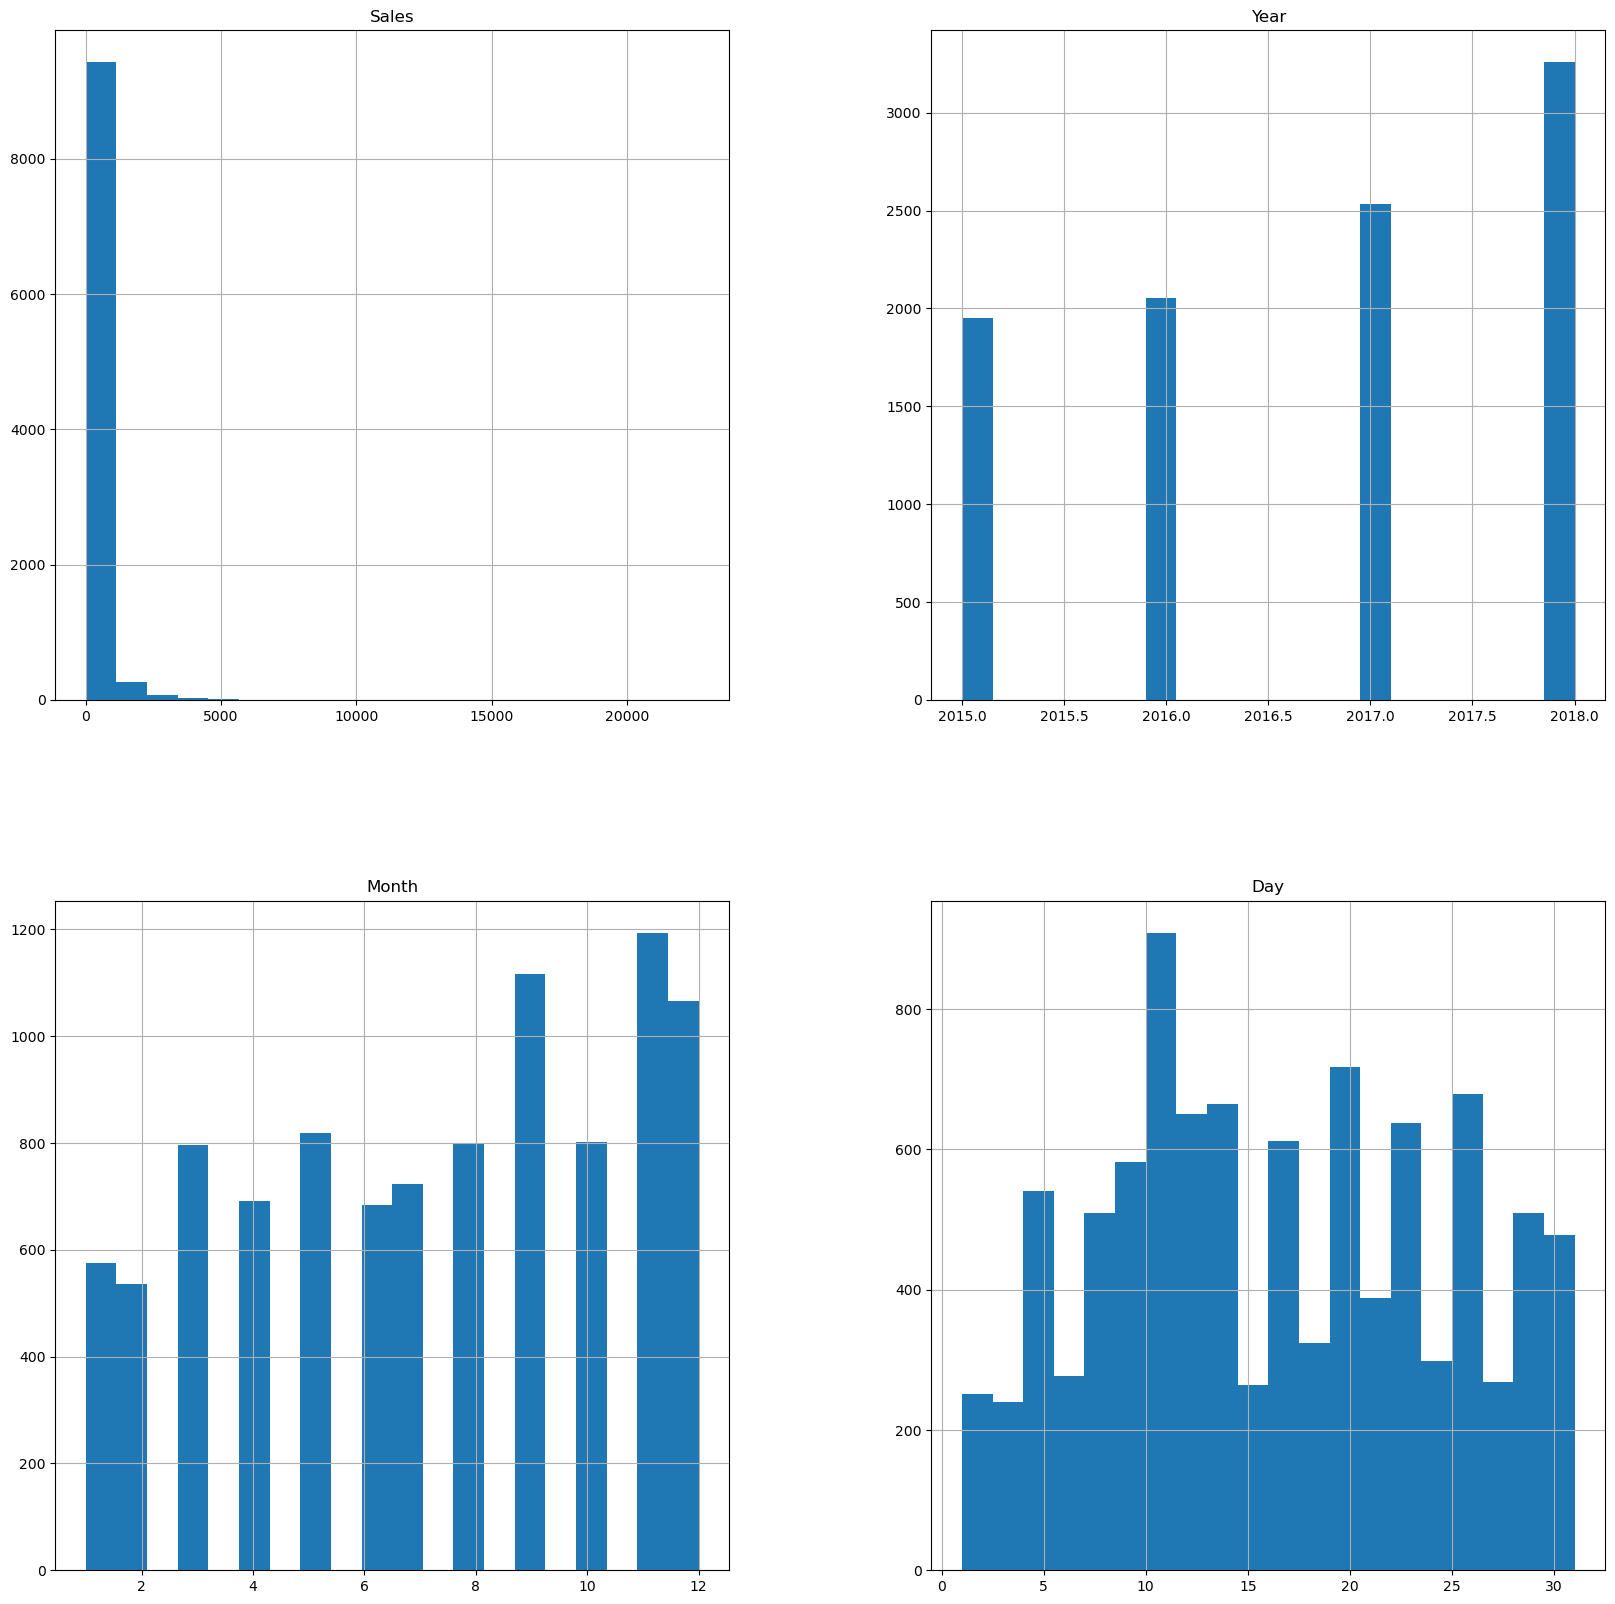

In [14]:
df[['Order Date','Ship Date','Sales','Year','Month','Day']].hist(bins=20, figsize=(20,20))

In [15]:
#now lets see the best customer list
#we will have to reset the index to add the customer name into dataframe
best_customer=df.pivot_table(values="Sales",index="Customer Name",aggfunc="sum")
best_customer.reset_index(inplace=True)
best_customer['Sales']=best_customer['Sales'].round(2)
best_customer

,Customer Name,Sales
0,Aaron Bergman,886.16
1,Aaron Hawkins,1744.70
2,Aaron Smayling,3050.69
3,Adam Bellavance,7755.62
4,Adam Hart,3250.34
...,...,...
788,Xylona Preis,2374.66
789,Yana Sorensen,6720.44
790,Yoseph Carroll,5454.35
791,Zuschuss Carroll,8025.71


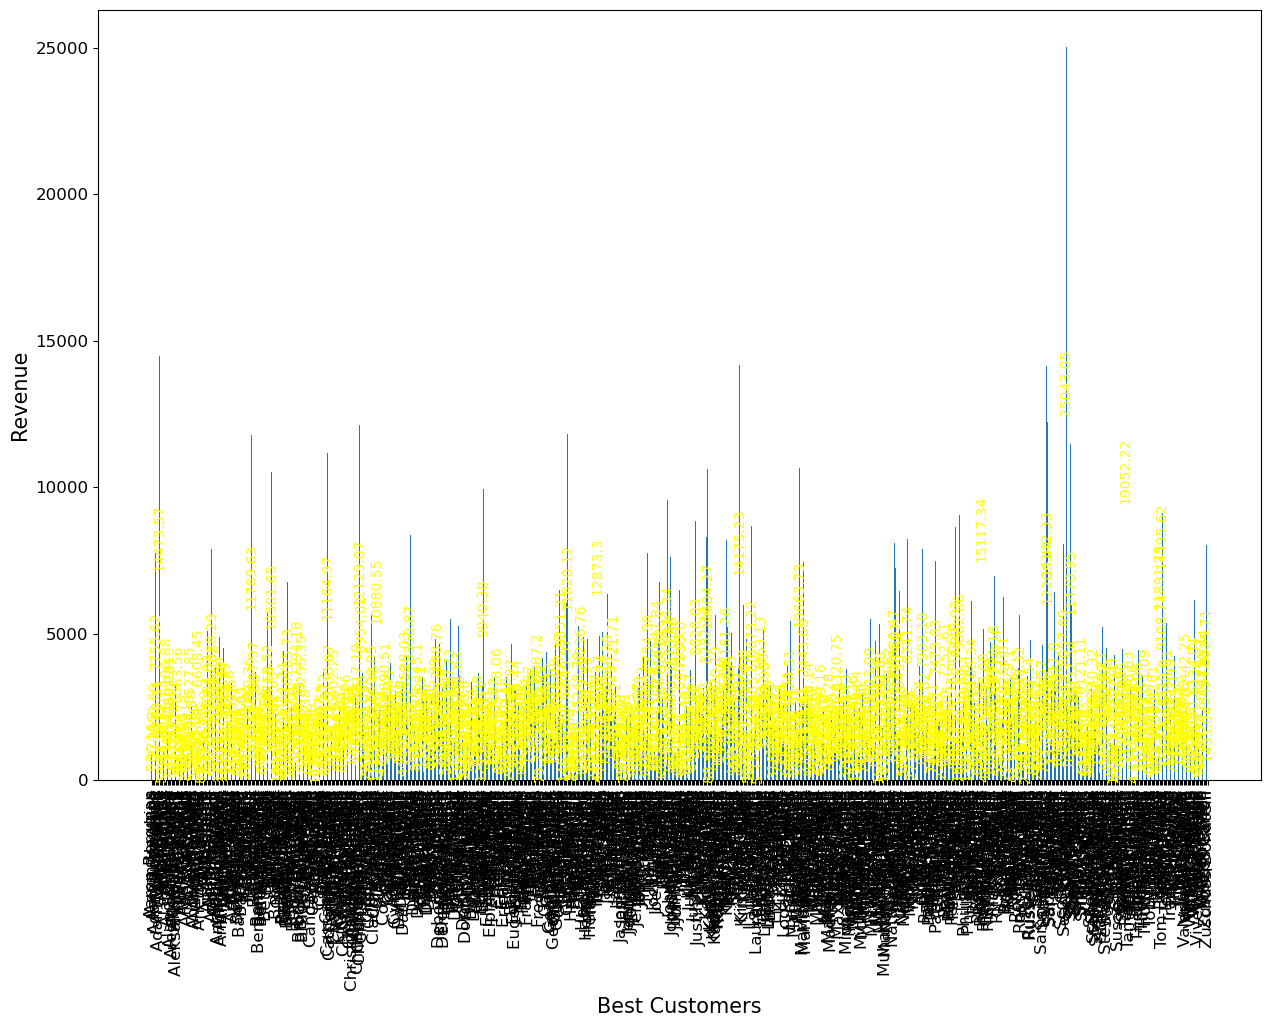

In [16]:
#now creating the bar plot of best customer with revenue
fig= plt.figure(figsize=(15,10))
plt.bar(best_customer['Customer Name'],best_customer['Sales'],width=0.4)
plt.xlabel("Best Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)

for i, v in enumerate(best_customer['Sales']):
    plt.text(i, v/2 , str(v) , ha='center', rotation=90 , color='yellow')
plt.show()

In [18]:
 #let's see the sales of the cities
best_cities= df.pivot_table(values="Sales",index="City",aggfunc="sum")
best_cities=best_cities.sort_values(by=['Sales'],ascending=False).head(20)
best_cities.reset_index(inplace=True)
best_cities['Sales']=best_cities['Sales'].round(2)
best_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


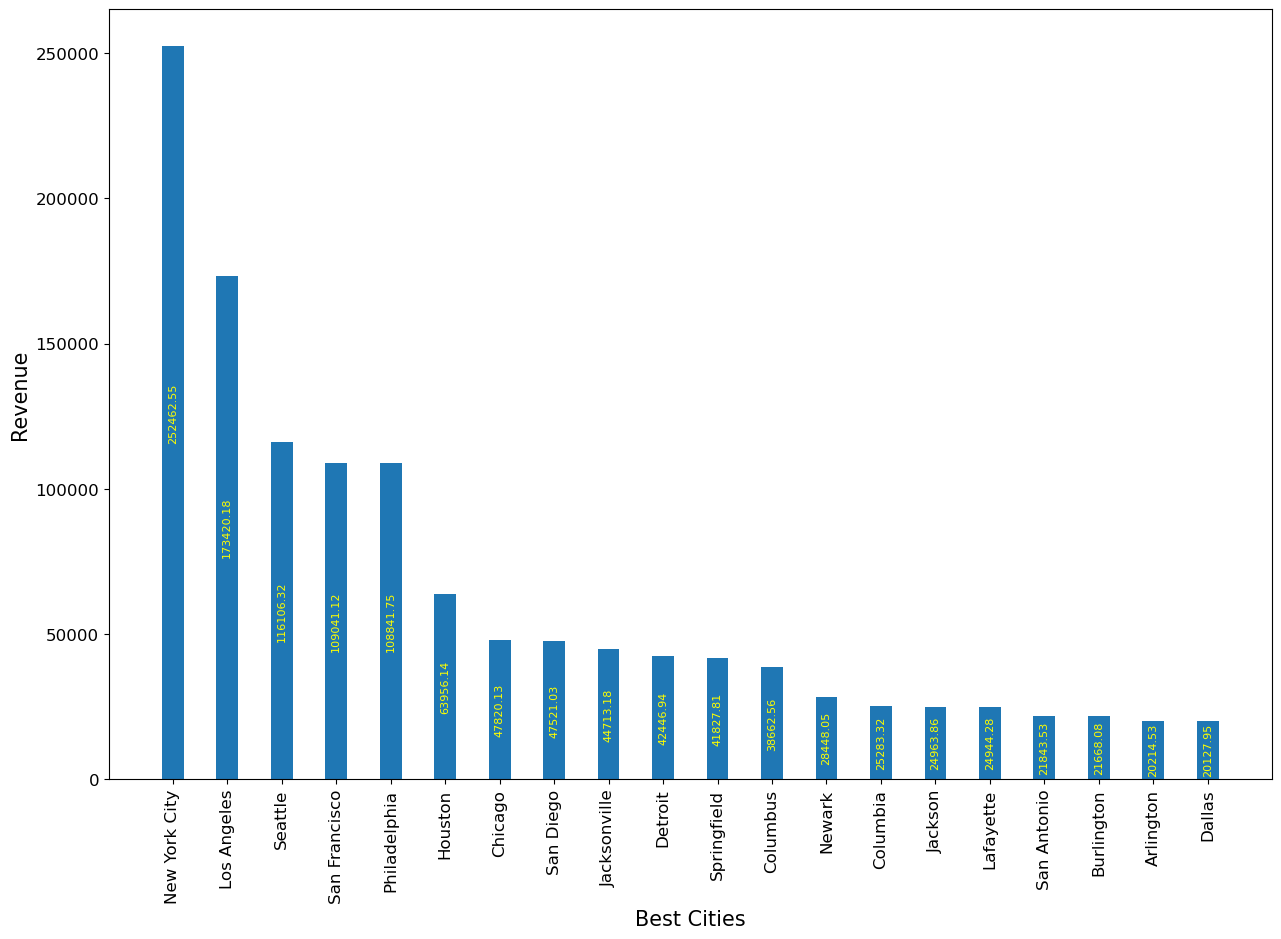

In [19]:
#CREATING THE BAR PLOT OF BEST CITIES WITH SALES

fig=plt.figure(figsize=(15,10))
plt.bar(best_cities['City'],best_cities['Sales'],width=0.4)
plt.xlabel("Best Cities",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
for i, v in enumerate(best_cities['Sales']):
    plt.text(i, v/2, str(v), ha='center', va='center', rotation=90, color='yellow', fontsize=8)
plt.show()

In [20]:
#LETS PRESENT THE SALES OF DIFFERENT CATEGORIES

In [21]:
best_category= df.pivot_table(values="Sales",index="Category",aggfunc="sum")
best_category=best_category.sort_values(by=['Sales'],ascending=False).head()
best_category.reset_index(inplace=True)
best_category['Sales']=best_cities['Sales'].round(2)
best_category

,Category,Sales
0,Technology,252462.55
1,Furniture,173420.18
2,Office Supplies,116106.32


In [22]:
#PRESENTING THE SALES OF DIFFERENT CATEGORIES THROUGH IE CHART

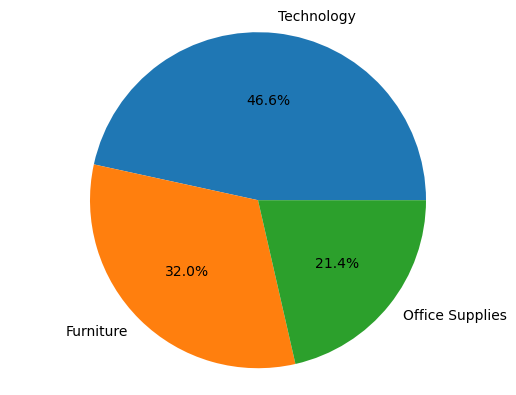

In [23]:
plt.pie(best_category['Sales'], labels=best_category['Category'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

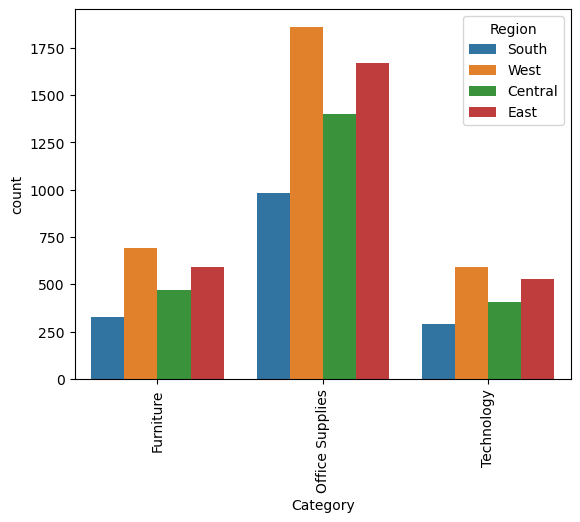

In [24]:
#PLOT THE CATEGORIES BY REGION
sns.countplot(data=df,x="Category",hue='Region')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Number of Customer Per Month')

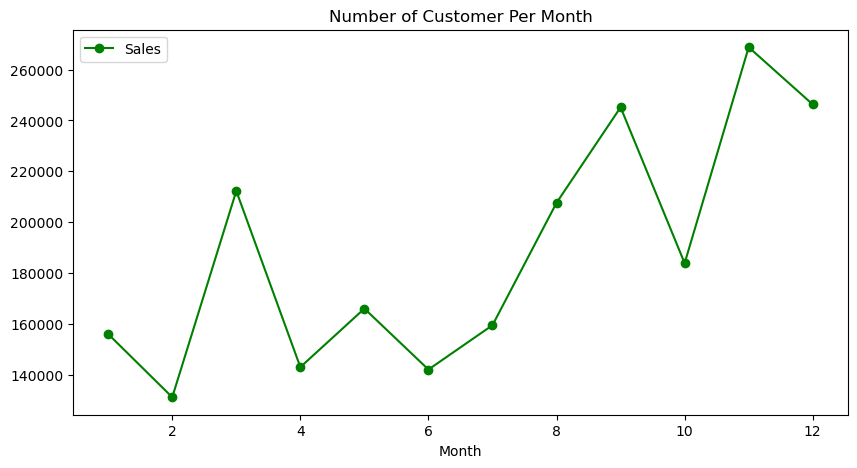

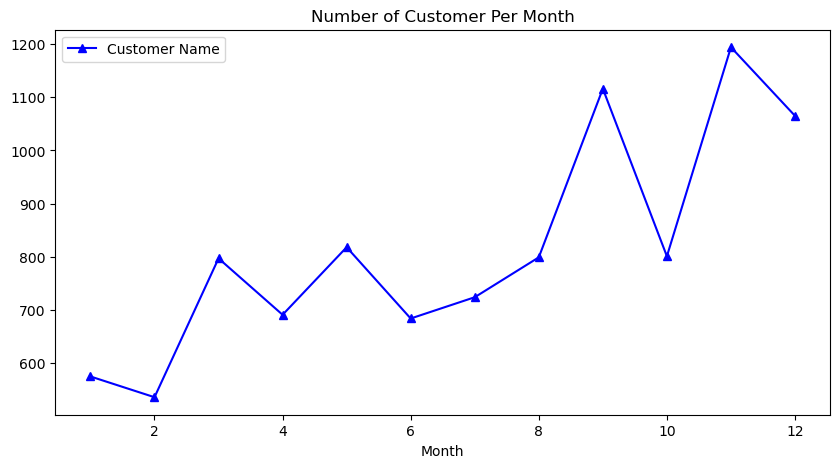

In [25]:
#PLOTING THE TOTAL SALES PER MONTH AND NUMBER OF CUSTOMER PER MONTH
axis = df.groupby('Month')[['Sales']].sum().plot(figsize=(10,5),marker='o',color='g')
axis.set_title('Number of Customer Per Month')


axis=df.groupby('Month')[['Customer Name']].count().plot(figsize=(10,5),marker='^',color='b')
axis.set_title('Number of Customer Per Month')

Text(0.5, 1.0, 'Number of Customer Per Day')

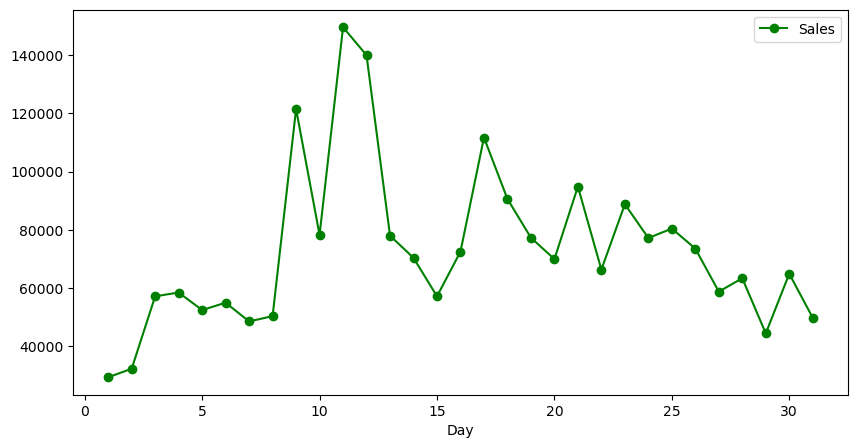

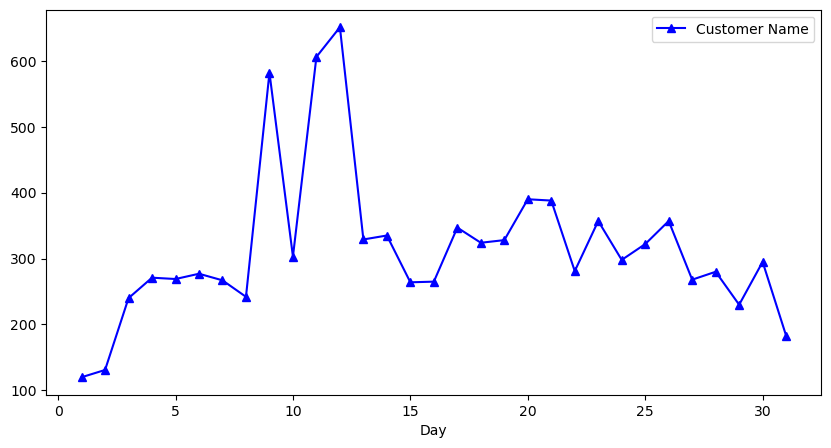

In [26]:
#NUMBER OF CUSTOMER PER DAY
ax = df.groupby('Day')[['Sales']].sum().plot(figsize=(10,5),marker='o',color='g')
axis.set_title('Total Sales Per Day')


ax=df.groupby('Day')[['Customer Name']].count().plot(figsize=(10,5),marker='^',color='b')
axis.set_title('Number of Customer Per Day')